In [2]:
import pandas as pd
import numpy as np

In [3]:
#MARINA FRIDMAN'S CODE
# load data (prepared by load_climate_clusts)
df = pd.read_csv('../data/klima_articles_5Copy.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('%d climate related articles' % df.shape[0])

print('%d climate articles come from NTB' % df.is_ntb.sum())

32037 climate related articles
4165 climate articles come from NTB


In [25]:
df.head()

,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_id,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb
id,,,,,,,,,,,,,,,,,,,,,
y5eVPkYqBbEP,https://www.transportlogistikk.no/gigantbestil...,NaN,www.transportlogistikk.no,Gigantbestilling av elektriske lastebiler - Tr...,DB Schenker inngår et nytt partnerskap med Vol...,DB Schenker inngår et nytt partnerskap med Vol...,"['DB Schenker', 'Volta Trucks', 'Europa']",NaN,NaN,0,...,NaN,NaN,NaN,NaN,2021-12-01,23,gigantbestilling av elektrisk lastebil transpo...,335_371,2021-12-01 23:03:00,False
5xe7LwoNwa7r,https://www.kvinnheringen.no/fergerederier-tru...,https://www.kvinnheringen.no/5-27-327032,www.kvinnheringen.no,(+) Fergerederier truer staten med søksmål,Tre fergerederier krever kompensasjon etter in...,"Nyhende, Ferje | Fergerederier truer staten me...",NaN,['Anders Brekke'],1.0,0,...,NaN,NaN,NaN,NaN,2021-12-01,21,fergerederi truer stat med søksmål,335_38,2021-12-01 21:00:00,False
KQe1rng0RaJY,https://www.bygg.no/byggenaeringen-spiller-sto...,https://www.bygg.no/article/1484499!/,www.bygg.no,(+) Byggenæringen spiller stor rolle i regjeri...,Det er nå sju uker siden regjeringen Støre trå...,Det er nå sju uker siden regjeringen Støre trå...,"['Støre', 'SV']",NaN,NaN,36,...,NaN,NaN,NaN,NaN,2021-12-01,20,byggenæring spill stor roll i regjering klimas...,335_12,2021-12-01 20:47:00,False
8mepQqNzpaMy,https://www.fvn.no/mening/kronikk/i/1Oxb1K/vi-...,NaN,www.fvn.no,(+)Vi når ikke våre klimamål uten nok nettkapa...,,Du leser nå en kronikk. Den uttrykker innsende...,NaN,['Jan Erik Eldor'],NaN,0,...,NaN,NaN,NaN,['oQeZVo3JgepZ'],2021-12-01,18,vi når ikk vår klimamål uten nok nettkapasit,335_3314,2021-12-01 18:45:00,False
YqaQ02YnGenj,https://www.bt.no/btmeninger/debatt/i/g6rROA/f...,NaN,www.bt.no,Debatt: – Flau klimainnsats kan koste Vestland...,Varsellampene bør blinke i alle styrerom langs...,Flau klimainnsats kan koste Vestlandet dyrt «N...,"['Noreg', 'Vestlandet', 'Lars', 'Henrik Paarup...",NaN,NaN,0,...,70.0,0.977957,"['9wdL81NYDdjP', 'QBeXo0gLvdyK']",NaN,2021-12-01,18,debatt flau klimainnsat kan kost vestland dyrt,335_3443,2021-12-01 18:31:00,False


In [5]:
df["pub_day"] = pd.to_datetime(df["pub_day"])

df["pub_day"]

id
y5eVPkYqBbEP   2021-12-01
5xe7LwoNwa7r   2021-12-01
KQe1rng0RaJY   2021-12-01
8mepQqNzpaMy   2021-12-01
YqaQ02YnGenj   2021-12-01
                  ...    
APdROYE5LeGy   2022-02-28
LDdwV9oDgb1Y   2022-02-28
WPe91rj0PeLy   2022-02-28
w9aANqZRlbvM   2022-02-28
MYer8R3vKbOB   2022-02-28
Name: pub_day, Length: 32037, dtype: datetime64[ns]

In [6]:
df["pub_day"].max() - df["pub_day"].min()
df["pub_day"].min(), df["pub_day"].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2022-05-31 00:00:00'))

In [7]:
df["month"] = df["pub_day"].dt.month

df["month"]

id
y5eVPkYqBbEP    12
5xe7LwoNwa7r    12
KQe1rng0RaJY    12
8mepQqNzpaMy    12
YqaQ02YnGenj    12
                ..
APdROYE5LeGy     2
LDdwV9oDgb1Y     2
WPe91rj0PeLy     2
w9aANqZRlbvM     2
MYer8R3vKbOB     2
Name: month, Length: 32037, dtype: int64

In [8]:
df.sort_values(by="pub_day").head()

,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb,month
id,,,,,,,,,,,,,,,,,,,,,
xkazmX2WreJ0,https://www.aftenposten.no/sport/meninger/i/2d...,NaN,www.aftenposten.no,"Kort sagt, lørdag 2. januar",Nye sykehus i Oslo. Hjemmefronten og jødene. V...,"Kort sagt, lørdag 2. januar Debattredaksjonen ...","['Oslo', 'Popper', 'Bærum', 'Michelet', 'Ketil...",NaN,NaN,0,...,0.921628,NaN,['y1aKO9BJRaQG'],2021-01-01,22,kort sagt lørdag janu,001_1600,2021-01-01 22:00:00,False,1
olejZYAoyejN,https://www.regjeringen.no/no/dokumentarkiv/re...,https://www.regjeringen.no/nn/dokumentarkiv/re...,www.regjeringen.no,Gir Enova eit sterkare klimamandat,Klima- og miljødepartementet og Enova har unde...,"For å endre skriftstorleiken, hald Ctrl-tasten...",['Mac'],['Klima- og miljødepartementet'],NaN,0,...,NaN,NaN,NaN,2021-01-01,3,gir enov eit sterkar klimamandat,001_574,2021-01-01 03:00:00,False,1
8mepQprE1aMy,https://www.home.saxo/nb-no/products/crypto?cm...,https://www.home.saxo/nb-no/products/crypto,www.home.saxo,Kryptohandel | Handle kryptopar og ETP-er på n...,Handle krypto på nettet med Saxo. Dra fordel a...,Risikoadvarsel for valuta og ETP-er Valuta er ...,NaN,NaN,NaN,0,...,NaN,NaN,"['4zbqYqwG3bpr', 'pnel5ljzlaKB']",2021-01-01,3,kryptohandel handl kryptop og etp er på nett,001_773,2021-01-01 03:00:00,False,1
zPdyr37qReQr,https://www.regjeringen.no/no/dokumentarkiv/re...,https://www.regjeringen.no/nn/dokumentarkiv/re...,www.regjeringen.no,Opner områder for havvind i Noreg,Ved kongeleg resolusjon er det i dag avgjort a...,Ved kongeleg resolusjon er det i dag avgjort a...,"['Tina Bru', 'Kongen', 'Sveinung Rotevatn', 'M...",['Olje- og energidepartementet'],NaN,0,...,0.658993,NaN,"['MYerR3BjLeOB', 'jnegLlZPGawZ', 'w9aANMV7BbvM']",2021-01-01,3,opn områd for havvind i noreg,001_1750,2021-01-01 03:00:00,False,1
MYer0oQjkbOB,https://ung.forskning.no/historie-klima/folk-s...,https://ung.forskning.no/a/1786146,ung.forskning.no,Folk slet med pandemi og klimakrise også for 5...,Stefka forsker på tekster fra middelalderen.,"Folk som levde i middelalderen, hadde nok et g...","['Stefka Eriksen', 'Norsk', 'Norge', 'Island',...",NaN,NaN,102,...,0.302041,NaN,['MvbmwjLDpeYA'],2021-01-01,4,folk slet med pandemi og klimakris også for år...,001_290,2021-01-01 04:49:00,False,1


In [30]:
df.shape

(32037, 38)

In [31]:
df2 = df.loc[:, ['pub_day']]

In [32]:
df2.sort_values(by='pub_day').head()

,pub_day
id,
xkazmX2WreJ0,2021-01-01
olejZYAoyejN,2021-01-01
8mepQprE1aMy,2021-01-01
zPdyr37qReQr,2021-01-01
MYer0oQjkbOB,2021-01-01


In [33]:
df["month"] = df["pub_day"].dt.month

df["month"]

id
y5eVPkYqBbEP    12
5xe7LwoNwa7r    12
KQe1rng0RaJY    12
8mepQqNzpaMy    12
YqaQ02YnGenj    12
                ..
APdROYE5LeGy     2
LDdwV9oDgb1Y     2
WPe91rj0PeLy     2
w9aANqZRlbvM     2
MYer8R3vKbOB     2
Name: month, Length: 32037, dtype: int64

In [9]:
#the top 10 dates with the most articles publishes 
df['pub_day'].value_counts().head(10)


2021-11-01    368
2021-08-09    344
2021-01-08    277
2021-11-13    267
2021-08-10    262
2021-11-08    253
2021-08-23    233
2021-10-28    217
2021-11-04    214
2021-10-12    203
Name: pub_day, dtype: int64

In [10]:
occur = df.groupby(['pub_day']).size()
display(occur)

pub_day
2021-01-01    20
2021-01-02    18
2021-01-03    38
2021-01-04    65
2021-01-05    63
              ..
2022-05-27    48
2022-05-28    16
2022-05-29    28
2022-05-30    62
2022-05-31    60
Length: 439, dtype: int64

In [11]:
df["pub_day"].count()

32037

In [12]:
df['pub_day'].dtype

dtype('<M8[ns]')

In [13]:
df['pub_day'].value_counts().to_dict()

{Timestamp('2021-11-01 00:00:00'): 368,
 Timestamp('2021-08-09 00:00:00'): 344,
 Timestamp('2021-01-08 00:00:00'): 277,
 Timestamp('2021-11-13 00:00:00'): 267,
 Timestamp('2021-08-10 00:00:00'): 262,
 Timestamp('2021-11-08 00:00:00'): 253,
 Timestamp('2021-08-23 00:00:00'): 233,
 Timestamp('2021-10-28 00:00:00'): 217,
 Timestamp('2021-11-04 00:00:00'): 214,
 Timestamp('2021-10-12 00:00:00'): 203,
 Timestamp('2021-04-22 00:00:00'): 202,
 Timestamp('2021-08-24 00:00:00'): 199,
 Timestamp('2021-11-11 00:00:00'): 195,
 Timestamp('2021-08-11 00:00:00'): 195,
 Timestamp('2021-11-05 00:00:00'): 193,
 Timestamp('2022-04-04 00:00:00'): 189,
 Timestamp('2021-08-16 00:00:00'): 189,
 Timestamp('2021-08-17 00:00:00'): 183,
 Timestamp('2021-08-26 00:00:00'): 176,
 Timestamp('2021-09-07 00:00:00'): 175,
 Timestamp('2021-10-13 00:00:00'): 174,
 Timestamp('2021-11-10 00:00:00'): 171,
 Timestamp('2021-01-11 00:00:00'): 167,
 Timestamp('2021-09-10 00:00:00'): 166,
 Timestamp('2021-08-13 00:00:00'): 162,


In [39]:
# create a sample dataframe with date column
#data = df
#df3 = pd.DataFrame(data)

# convert the date column to datetime type
#df3['pub_day'] = pd.to_datetime(df3['pub_day'])

# count the occurrences of each date
#counts = df3['pub_day'].value_counts()

#print(counts)
#counts.head()


In [14]:
# create a sample dataframe with date column
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

# group the data by date and count the occurrences
counts = df4.groupby('pub_day').size().reset_index(name='counts')

counts.head()

,pub_day,counts
0,2021-01-01,20
1,2021-01-02,18
2,2021-01-03,38
3,2021-01-04,65
4,2021-01-05,63


In [15]:
import matplotlib.pyplot as plt

data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

# group the data by date and count the occurrences
counts = df4.groupby('pub_day').size().reset_index(name='counts')

#counts.to_csv('../master/data/counts.csv')
# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date Counts')

# format the x-axis labels to display only the date
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))

plt.show()

#fig.savefig('../master/figures/all_counts.png')

<Figure size 2000x1000 with 1 Axes>

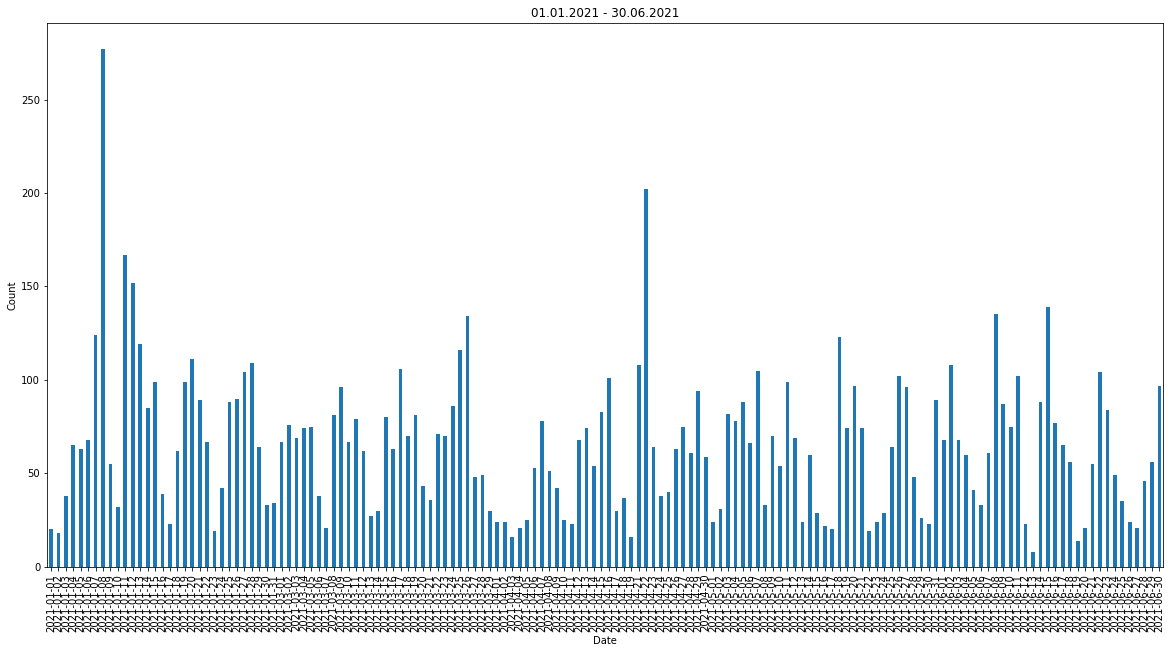

In [16]:
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])


# group the data by date and count the occurrences
counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-01-01'
end_date = '2021-06-30'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('01.01.2021 - 30.06.2021')

# format the x-axis labels to display only the date
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))

plt.show()

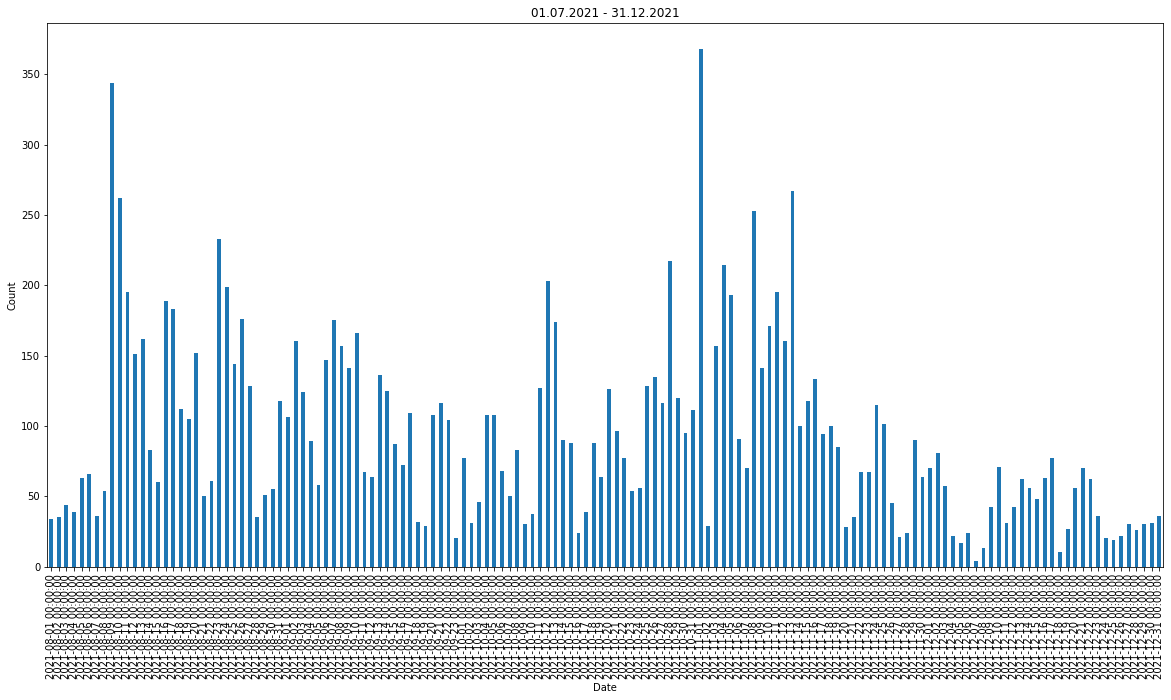

In [43]:

data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

# group the data by date and count the occurrences
counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-08-01'
end_date = '2021-12-31'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False)


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('01.07.2021 - 31.12.2021')

# format the x-axis labels to display only the date
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))


plt.show()


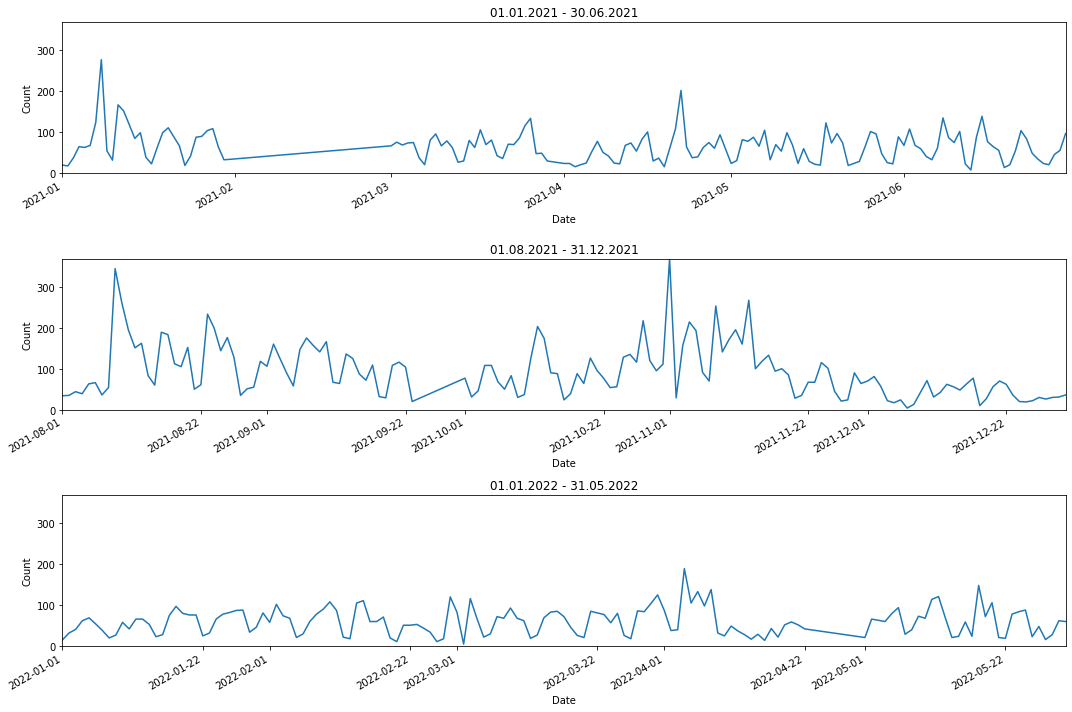

In [44]:
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])


counts = df4.groupby('pub_day').size().reset_index(name='counts')


start_date = '2021-01-01'
end_date = '2021-06-30'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

fig, axs = plt.subplots(3, 1)


# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False, ax=axs[0])


axs[0].set_xlabel('Date')
axs[0].set_ylabel('Count')
axs[0].set_title('01.01.2021 - 30.06.2021')
#axs[0].set_xticks(counts.index[::7])
#axs[0].set_xticklabels(counts['pub_day'][::7])

counts_2 = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-08-01'
end_date = '2021-12-31'

counts_2 = counts_2[(counts_2['pub_day'] >= start_date) & (counts_2['pub_day'] <= end_date)]

counts_2.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False, ax=axs[1])

axs[1].set_xlabel('Date')
axs[1].set_ylabel('Count')
axs[1].set_title('01.08.2021 - 31.12.2021')
#axs[1].set_xticks(counts_2.index[::7])
#axs[1].set_xticklabels(counts_2['pub_day'][::7])

max_y = counts_2['counts'].max()
axs[1].set_ylim([0, max_y])

counts_3 = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2022-01-01'
end_date = '2022-05-31'

counts_3 = counts_3[(counts_3['pub_day'] >= start_date) & (counts_3['pub_day'] <= end_date)]

counts_3.plot(x='pub_day', y='counts', kind='line', figsize=(15, 10), legend=False, ax=axs[2])


axs[2].set_xlabel('Date')
axs[2].set_ylabel('Count')
axs[2].set_title('01.01.2022 - 31.05.2022')
#axs[2].set_xticks(counts_3.index[::7])
#axs[2].set_xticklabels(counts_3['pub_day'][::7])

max_y = counts_2['counts'].max()
axs[0].set_ylim([0, max_y])
axs[2].set_ylim([0, max_y])


#fig.suptitle('The whole dataset divided into three periods')
fig.tight_layout()
plt.show()



In [45]:
sum_1 = counts['counts'].sum()
sum_2 = counts_2['counts'].sum()
sum_3 = counts_3['counts'].sum()
print("The total number of articles from 01.01.2021 - 30.06.2021 is", sum_1)
print("The total number of articles from 01.08.2021 - 31.12.2021 is", sum_2)
print("The total number of articles from 01.01.2022 - 31.05.2022 is", sum_3)

The total number of articles from 01.01.2021 - 30.06.2021 is 9791
The total number of articles from 01.08.2021 - 31.12.2021 is 13728
The total number of articles from 01.01.2022 - 31.05.2022 is 8518


## Spike 1

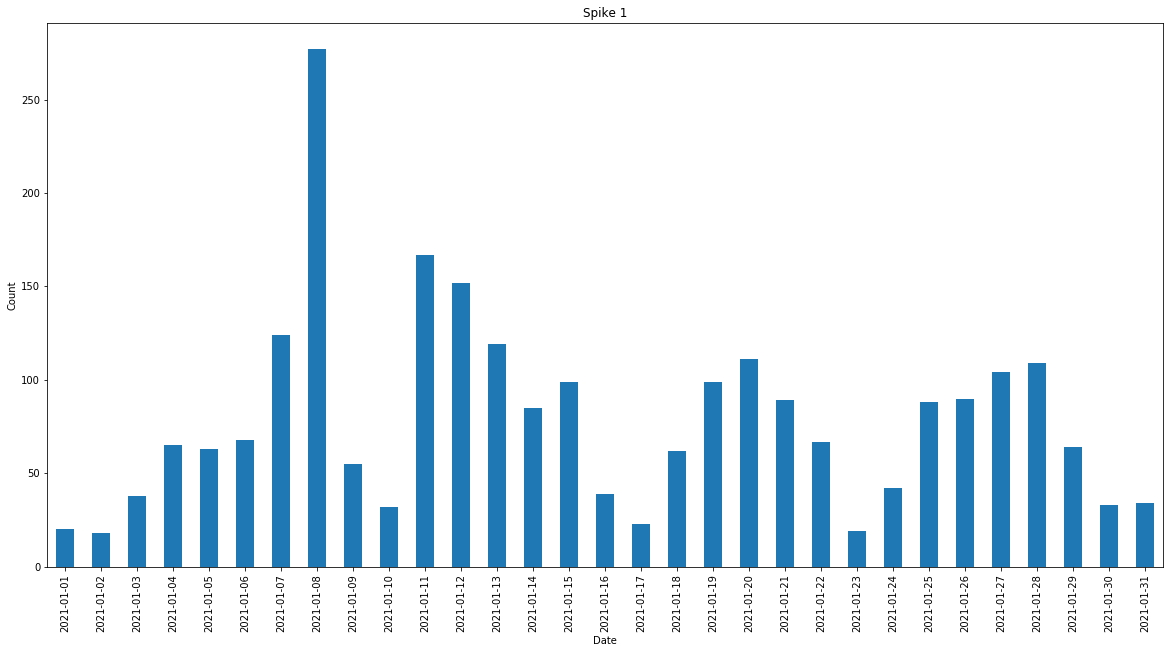

In [46]:
from datetime import date

#Spike 1

data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-01-01'
end_date = '2021-01-31'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike1.csv')

# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Spike 1')

# format the x-axis labels to display only the date
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))

#plt.savefig('../master/figures/spike1.png')
plt.show()



In [47]:
total_articles = counts['counts'].sum()
print("The total number of articles in Spike 1 is", total_articles)


The total number of articles in Spike 1 is 2455


Here is a list and then a graph of domains and how many articles they published on the day with the highest spike 

In [51]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

date = '2021-01-08'
data = df[df['pub_day'] == date]

domain_counts = data['domain'].value_counts()

table = pd.DataFrame({'domain': domain_counts.index, 'count': domain_counts.values})

#table.to_csv('../master/data/spike1_domains.csv')
table.head(25)


,domain,count
0,e24.no,24
1,www.nrk.no,14
2,www.nettavisen.no,11
3,www.smp.no,10
4,www.adressa.no,10
5,www.fjordabladet.no,9
6,www.rbnett.no,9
7,www.bygg.no,8
8,www.nyss.no,8
9,www.itromso.no,8


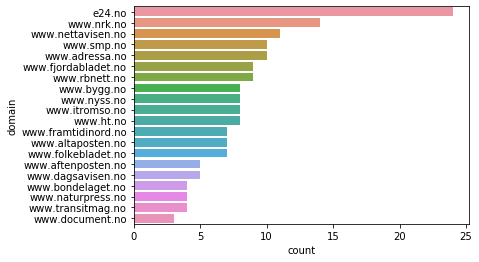

In [53]:
import seaborn as sns

sns.barplot(x='count', y='domain', data=table[:20])
plt.xticks(rotation=0)
#plt.savefig('../master/figures/spike1_domains_graph.png', bbox_inches='tight')
plt.show()


# Spike 2

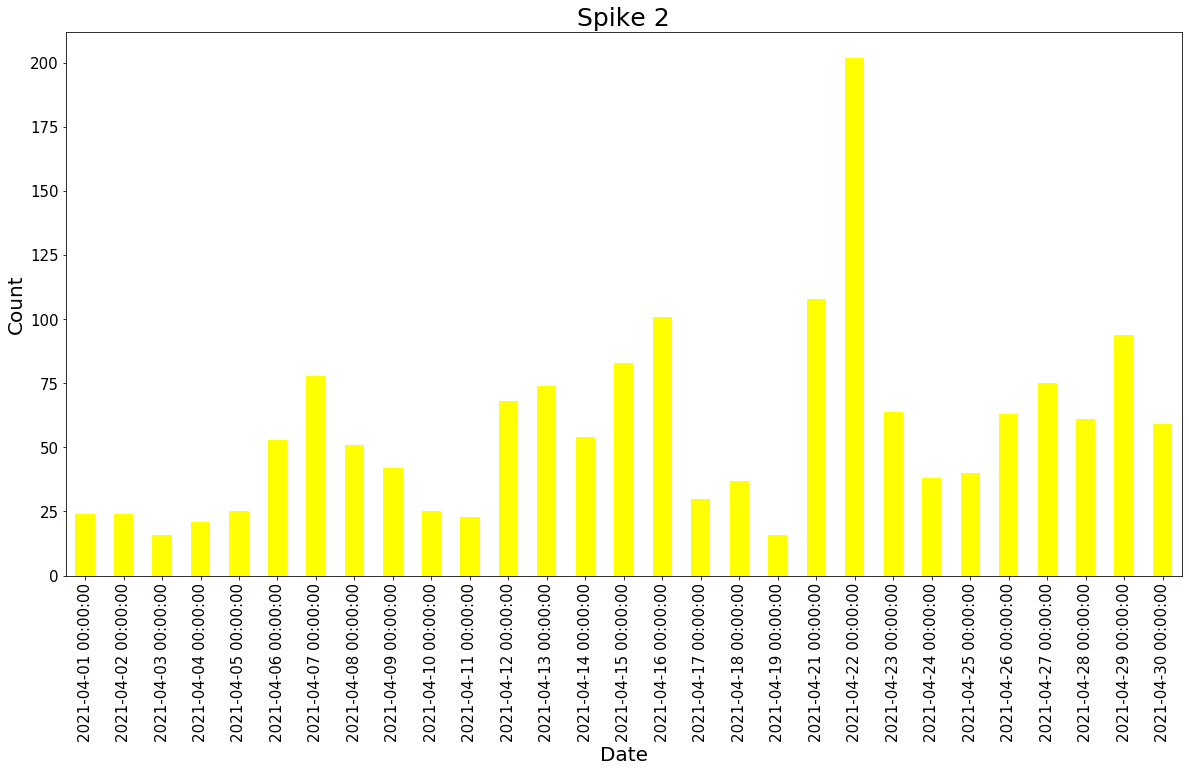

In [43]:
#Spike 2
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-04-01'
end_date = '2021-04-30'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike2.csv')
#for date in counts['pub_day']:
#    datetime.strptime(str(date), '%Y-%m-%d')

# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='yellow')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 2', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../master/figures/spike2.png', bbox_inches='tight')
plt.show()

In [44]:
total_articles = counts['counts'].sum()
print("The total number of articles in Spike 2 is", total_articles)

The total number of articles in Spike 2 is 1649


In [45]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

date = '2021-04-22'
data = df[df['pub_day'] == date]

domain_counts = data['domain'].value_counts()

table = pd.DataFrame({'domain': domain_counts.index, 'count': domain_counts.values})

#table.to_csv('../master/data/spike2_domains.csv')
table.head(10)

,domain,count
0,www.nrk.no,22
1,www.nyss.no,16
2,www.fjordabladet.no,16
3,www.rbnett.no,7
4,www.nettavisen.no,7
5,www.smp.no,7
6,resett.no,6
7,www.adressa.no,6
8,www.itromso.no,5
9,www.framtidinord.no,5


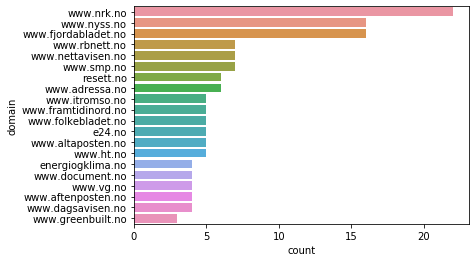

In [46]:
sns.barplot(x='count', y='domain', data=table[:20])
plt.xticks(rotation=0)
#plt.savefig('../master/figures/spike2_domains_graph.png', bbox_inches='tight')
plt.show()

# Spike 3

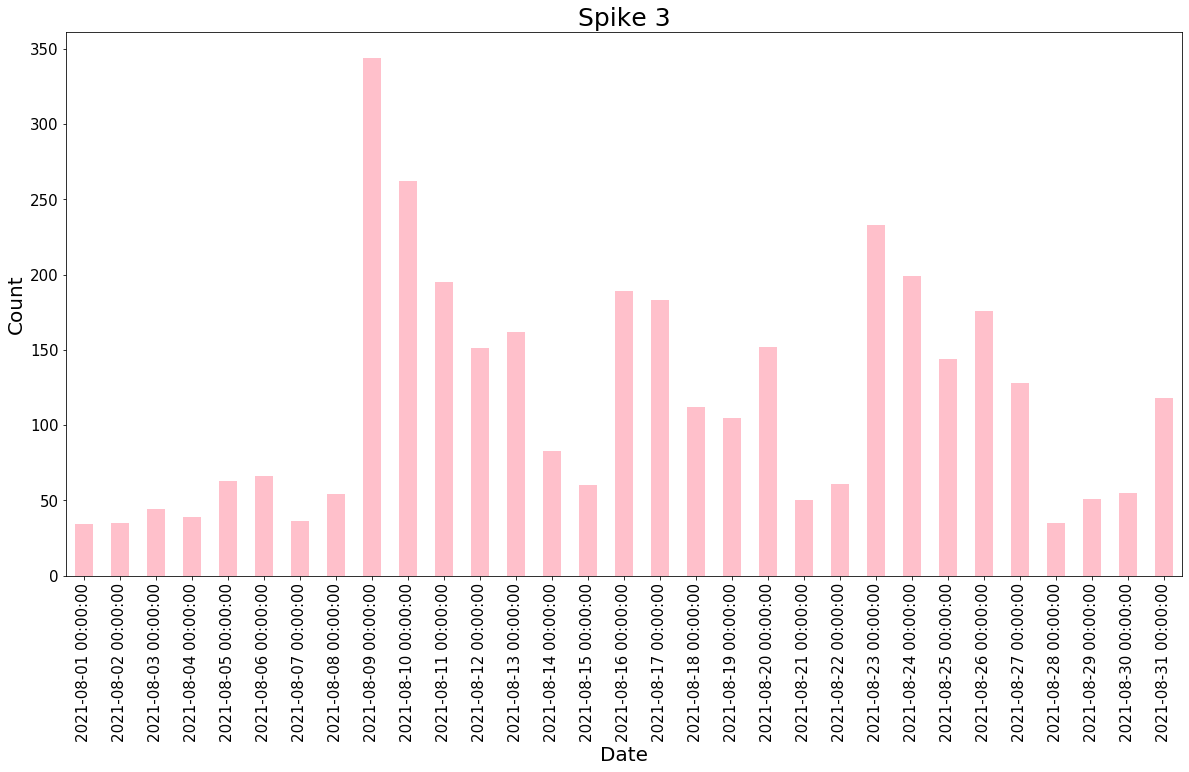

In [75]:
#Spike 3
#THERE'S NO DATA FROM JULY?????
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-08-01'
end_date = '2021-08-31'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike3.csv')
# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='pink')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 3', fontsize=25)

# format the x-axis labels to display only the date
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../master/figures/spike3.png', bbox_inches='tight')
plt.show()

In [76]:
total_articles = counts['counts'].sum()
print("The total number of articles in Spike 3 is", total_articles)

The total number of articles in Spike 3 is 3619


In [49]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

date = '2021-08-09'
data = df[df['pub_day'] == date]

domain_counts = data['domain'].value_counts()

table = pd.DataFrame({'domain': domain_counts.index, 'count': domain_counts.values})

#table.to_csv('../master/data/spike3_domains.csv')
table.head(10)

,domain,count
0,www.nrk.no,21
1,www.nyss.no,17
2,www.fjordabladet.no,17
3,e24.no,15
4,www.nettavisen.no,13
5,www.dagsavisen.no,11
6,www.aftenbladet.no,11
7,www.smp.no,10
8,www.aftenposten.no,9
9,www.itromso.no,9


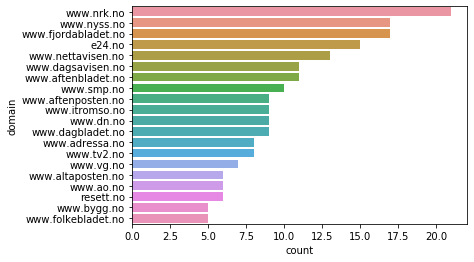

In [50]:
sns.barplot(x='count', y='domain', data=table[:20])
plt.xticks(rotation=0)
#plt.savefig('../master/figures/spike3_domains_graph.png', bbox_inches='tight')
plt.show()

# Spike 4

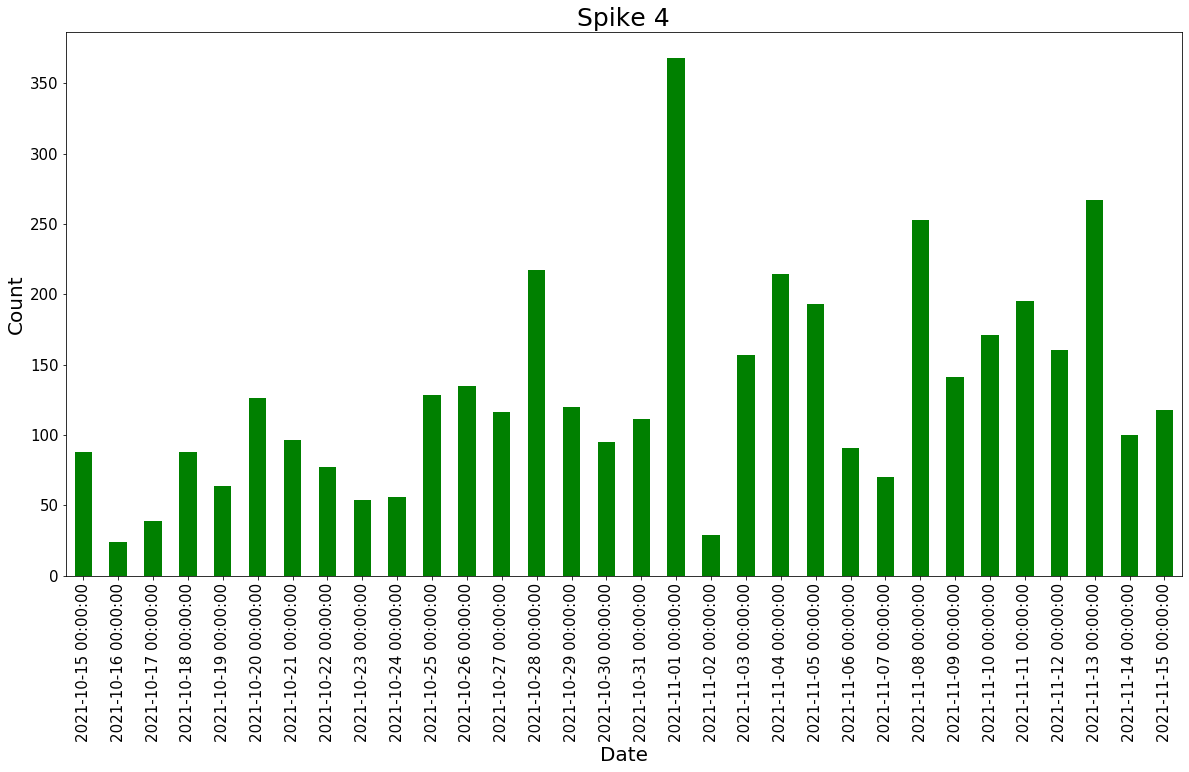

In [51]:
#Spike 4
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-10-15'
end_date = '2021-11-15'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike4.csv')
# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='green')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 4', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../master/figures/spike4.png', bbox_inches='tight')
plt.show()

In [52]:
total_articles = counts['counts'].sum()
print("The total number of articles in Spike 4 is", total_articles)

The total number of articles in Spike 4 is 4161


In [53]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

date = '2021-11-01'
data = df[df['pub_day'] == date]

domain_counts = data['domain'].value_counts()

table = pd.DataFrame({'domain': domain_counts.index, 'count': domain_counts.values})

#table.to_csv('../master/data/spike4_domains.csv')
table.head(10)

,domain,count
0,www.nrk.no,28
1,www.adressa.no,20
2,www.nettavisen.no,19
3,www.folkebladet.no,18
4,www.ht.no,16
5,www.framtidinord.no,16
6,www.rbnett.no,16
7,www.altaposten.no,16
8,www.smp.no,16
9,www.itromso.no,16


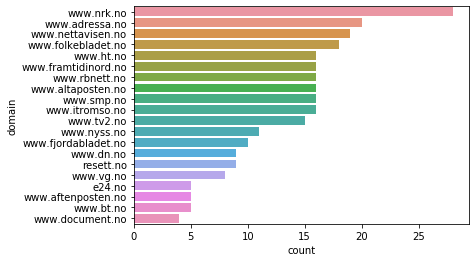

In [54]:
sns.barplot(x='count', y='domain', data=table[:20])
plt.xticks(rotation=0)
#plt.savefig('../master/figures/spike4_domains_graph.png', bbox_inches='tight')
plt.show()

# Spike 5

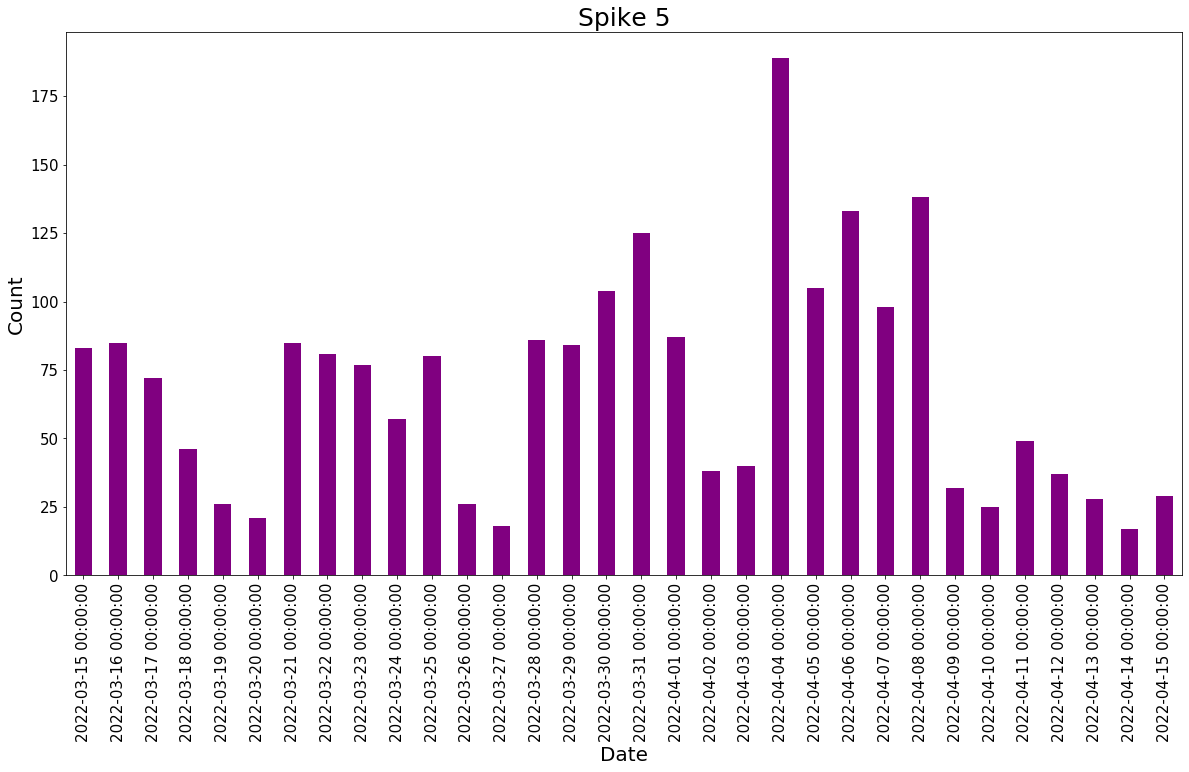

In [55]:
#Spike 5
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#def format_date(x, pos=None):
#    return mdates.num2date(x).strftime("%Y-%m-%d")

data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

counts = df4.groupby('pub_day').size().reset_index(name='counts')

start_date = '2022-03-15'
end_date = '2022-04-15'

# slice the data between the start and end dates
counts = counts[(counts['pub_day'] >= start_date) & (counts['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike5.csv')
# plot the date count data using pandas plot method
counts.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='purple')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 5', fontsize=25)

#counts = counts.sort_values(by='date')
#plt.xticks(counts.index, counts['pub_day'].dt.strftime("%Y-%m-%d"), fontsize=10, rotation=0)
# format the x-axis labels to display only the date
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts['pub_day'].dt.strftime("%Y-%m-%d")))
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_date))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../master/figures/spike5.png', bbox_inches='tight')
plt.show()

In [56]:
total_articles = counts['counts'].sum()
print("The total number of articles in Spike 5 is", total_articles)

The total number of articles in Spike 5 is 2201


In [180]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

date = '2022-04-04'
data = df[df['pub_day'] == date]

domain_counts = data['domain'].value_counts()

table = pd.DataFrame({'domain': domain_counts.index, 'count': domain_counts.values})

#table.to_csv('../master/data/spike5_domains.csv')
table.head(10)

,domain,count
0,www.nrk.no,14
1,www.vl.no,14
2,www.adressa.no,10
3,e24.no,8
4,www.bygg.no,7
5,www.abcnyheter.no,7
6,www.aftenposten.no,6
7,www.dagsavisen.no,5
8,www.vg.no,5
9,www.nettavisen.no,5


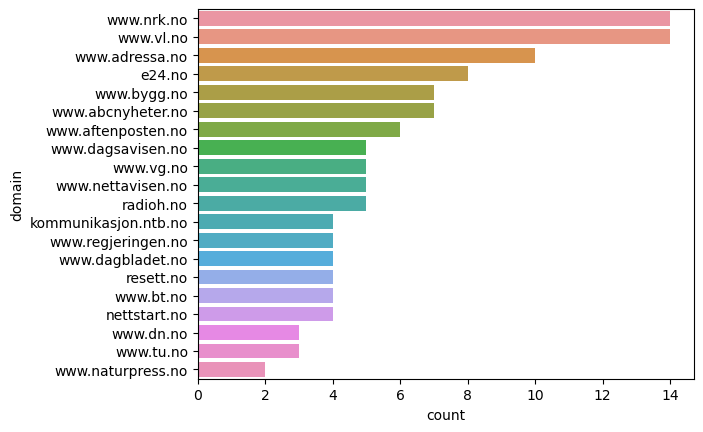

In [181]:
sns.barplot(x='count', y='domain', data=table[:20])
plt.xticks(rotation=0)
plt.savefig('../master/figures/spike5_domains_graph.png', bbox_inches='tight')
plt.show()

IMPORTANT!!!:
E24 articles are published in different publications across Schibsted, therefore there are more articles in the count for E24 (checked with spike 1, it's really more like 11-ish, so should be under NRK). However, they are till up there, but we have to take the exact count with a grain of salt. Sam goes for some publications like nyss and fjordabladet which have published the exact same articles. NRK have a few duplicates as well, mostly a slight change in title, however not as many as E24. 

# Some notes, thoughts and explanation
I did struggle for a while here. I googled for a long time and attempted a lot of different variations
of what I hoped would work, however each time the counting of the dates came out as if there were only one
occurance of each date, which I knew to be wrong by looking a the head of the table further up in the notebook. 
I then remembered the AI tool ChatGPT which I had been recommended by my supervisor to use for coding. 
It is secifically good to use for coding because you can ask it specific questions and most of the time you will get
an answer. With the answers from the AI I managed to swap the examples it gave me with my dataset and my own dates 
which returned, to my excitment, a graph! 

In [60]:
spike1.head()


NameError: name 'spike1' is not defined

In [182]:
#the 10 dates with the least articles publishes 
df['pub_day'].value_counts().tail(10)

2022-01-01    15
2021-06-19    14
2022-04-16    14
2021-12-08    13
2022-02-20    11
2022-02-26    11
2021-12-18    10
2021-06-13     8
2022-03-02     5
2021-12-07     4
Name: pub_day, dtype: int64

In [183]:
#the 10 dates with the most articles publishes 
df['pub_day'].value_counts().head(10)

2021-11-01    368
2021-08-09    344
2021-01-08    277
2021-11-13    267
2021-08-10    262
2021-11-08    253
2021-08-23    233
2021-10-28    217
2021-11-04    214
2021-10-12    203
Name: pub_day, dtype: int64

In [184]:
df4['pub_day'].dtype

dtype('<M8[ns]')

In [22]:
spike1 = df[df.pub_day == '2021-01-08']

#Printing the first 10 titles and descriptions in
#a way that is easier to read.
for idx, row in spike1.head(20).iterrows():
    print(row.url)
    print(row.title)
    print(row.description)
    print('----')

https://www.fjordabladet.no/nyhende/2021/01/08/Klimaplan-varslar-kraftig-auke-av-CO2-avgifta-23290592.ece
(+) Klimaplan varslar kraftig auke av CO2-avgifta
I den nye klimaplanen går regjeringa inn for ei skjerping av CO2-avgifta til 2.000 kroner per tonn i 2030, mot 590 kroner i dag.
----
https://www.dagbladet.no/meninger/ja-til-norge-forst/73260594
Ja til «Norge først»
I klimapolitikken sier vi gjerne «Norge først», ellers vil landet og økonomien havne helt i bakleksa. Regjeringens nye klimamelding bør danne utgangspunkt for et bredt forlik på Stortinget.
----
https://www.ba.no/nyhet/bat/elektrisk-bat/etablerer-el-batpool-i-bergen/s/5-8-1521337
(+) Etablerer el-båtpool i Bergen
Med seg har de den første helnorske, helelektriske skjærgårdsjeepen, med en toppfart på 40 knop. – Bevis på at nullutslippsbåtlivet funker, sier gründeren.
----
https://www.nrk.no/norge/etterlyser-konkrete-tiltak-i-klimameldingen-for-a-redusere-utslipp-fra-jordbruket-1.15319265
Etterlyser konkrete tiltak i Klim

In [74]:
spike2 = df[df.pub_day == '2021-04-22']

#Printing the first 10 titles and descriptions in
#a way that is easier to read.
for idx, row in spike2.head(20).iterrows():
    print(row.url)
    print(row.title)
    print(row.description)
    print('----')

https://www.document.no/2021/04/22/klimatoppmote-den-industrielle-verden-lover-a-odelegge-sin-egen-okonomi/
Klimatoppmøte: Den industrielle verden lover å ødelegge sin egen økonomi
Hans Rustad
----
https://www.nrk.no/norge/unge-venstre-vil-forby-nysalg-av-utslippsbiler-_-elbilforeningen-stritter-mot-1.15466251
Unge Venstre vil forby nysalg av utslippsbiler – Elbilforeningen stritter mot
Unge Venstre vil kjempe for et forbud mot salg av utslippsbiler fra 2025 på helgens landsmøte i Venstre. Det mener Elbilforeningen er en dårlig idé.
----
https://www.midtnorskdebatt.no/meninger/ordetfritt/2021/04/22/Uansvarlig-lek-med-tall-og-klima-langs-E6-23827886.ece
Uansvarlig lek med tall og klima langs E6
…
----
https://www.adressa.no/meninger/ordetfritt/2021/04/22/Uansvarlig-lek-med-tall-og-klima-langs-E6-23827886.ece
Uansvarlig lek med tall og klima langs E6
…
----
https://www.fauna.no/naturvern/slik-kan-laks-og-orret-hjelpes-forbi-elvekraftverk/
Slik kan laks og ørret hjelpes forbi elvekraftver

In [78]:
spike3 = df[df.pub_day == '2021-08-09']

#Printing the first 10 titles and descriptions in
#a way that is easier to read.
for idx, row in spike3.head(20).iterrows():
    print(row.url)
    print(row.title)
    print(row.description)
    print('----')

https://xn--bodposten-n8a.no/leserinnlegg-klimakrisen-loses-ikke-med-symboltiltak/
LESERINNLEGG: Klimakrisen løses ikke med symboltiltak - Bodøposten.no
Klimadebatten har blitt en så stor konkurranse i å grønnmale seg selv, at det går på bekostning av klimatiltakenes effekt og skattebetalernes penger. Av Terje Halleland, medlem av Stortingets energi- og miljøkomité for Frp Det har den siste tiden vært mye snakk om Regjeringens storsatsning på elektrifisering av norsk sokkel. Både Regjeringen og opposisjonen har …
----
https://www.folkebladet.no/nyheter/2021/08/09/G%C3%A5r-i-strupen-p%C3%A5-H%C3%B8yre-%E2%80%93-Fatter-ikke-at-han-kan-se-velgerne-i-%C3%B8ynene-24398702.ece
Går i strupen på Høyre: – Fatter ikke at han kan se velgerne i øynene
MDG går i strupen på Høyre og Erna Solberg etter at FNs klimarapport kom ut mandag morgen.
----
https://www.bygg.no/rif-dyster-lesning-men-dessverre-ikke-overraskende/1473743!/
RIF: Dyster lesning, men dessverre ikke overraskende
– Klimarapporten er 

In [20]:
spike4 = df[df.pub_day == '2021-11-01']

#Printing the first 10 titles and descriptions in
#a way that is easier to read.
for idx, row in spike4.head(35).iterrows():
    print(row.url)
    print(row.title)
    print(row.description)
    print('----')

https://www.nrk.no/nyheter/brasil-oppdaterer-klimamalene-sine-1.15713248
Brasil oppdaterer klimamålene sine
Innen 2030 skal utslippet av drivhusgasser reduserer med 50 prosent, opp fra 43 prosent som ble vedtatt i 2005, heter det i Brasils nye og skjerpede klimamål. Landet lover også å eliminere ulovlig avskoging innen 2028, to år tidligere enn et tidligere løfte, ifølge NTB.
----
https://www.nettavisen.no/nyheter/utenriks/brasil-oppdaterer-landets-klimamal/s/12-95-3424199498
Brasil oppdaterer landets klimamål
Innen 2030 skal utslippet av drivhusgasser reduserer med 50 prosent, opp fra 43 prosent som ble vedtatt i 2005, heter det i Brasils nye og skjerpede klimamål.
----
https://www.altaposten.no/lokalt/NTB/NTB_utenriks/2021/11/02/Brasil-oppdaterer-landets-klimam%C3%A5l-24770839.ece
Brasil oppdaterer landets klimamål
Innen 2030 skal utslippet av drivhusgasser reduserer med 50 prosent, opp fra 43 prosent som ble vedtatt i 2005, heter det i Brasils nye og skjerpede klimamål.
----
https:/

In [82]:
spike5 = df[df.pub_day == '2022-04-04']

#Printing the first 10 titles and descriptions in
#a way that is easier to read.
for idx, row in spike5.head(20).iterrows():
    print(row.url)
    print(row.title)
    print(row.description)
    print('----')

https://www.besteforeldreaksjonen.no/2022/04/bedre-nattogtilbud/
Ert bedre nattogtilbud
Nattoget er viktig for at flere skal kunne reise klimasmart over lengre avstander. Vi trenger både flere avganger og vogner med plass til flere passasjerer. Med forbauselse ser vi derfor at Norske Tog ser ut til å legge planer som vil innebære lavere og ikke høyere kapasitet. Besteforeldrenes klimaaksjon ber samferdselsministeren gripe inn. Norge trenger…
----
https://www.klimarealistene.com/2022/04/05/klimarapport-fra-ipcc-takeheimen/
Klimarapport fra IPCC-tåkeheimen
Klimarapport 6, del 3 er lansert i dag, med de nyeste skremslene. Her er det du trenger å vite om den dommedag som tvinges på deg i klimatestamentets sjette bok.
----
https://nettstart.no/innenriks/ny-klimarapport-dette-er-ikke-tiden-for-utsettelser/
Ny klimarapport: – Dette er ikke tiden for utsettelser - Nettstart ;-)
FNs klimarapport mandag satte også fyr i debatten hjemme i Norge. Opposisjonspartiene mener Støre-regjeringen ikke gj

# 

In [68]:

spike4 = df[df.pub_day == '2021-11-01']
nrk4 = spike4[df.domain.str.contains('nrk')]
nrk_titles4 = nrk4['title'].value_counts()
print(nrk_titles4)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Åpningsseremoni i Glasgow                                              2
David Attenborough med hard, men optimistisk tale på klimatoppmøtet    2
India vil være utslippsfri innen 2070                                  1
Dronning Elizabeth: Nå er tiden for handling                           1
Dronning Elizabeth i god driv                                          1
Klimatoppmøtet i Glasgow                                               1
Beklaget at Trump trakk USA ut                                         1
Søppeltømmere streiker i Glasgow                                       1
– Må handle for å redde menneskeheten                                  1
Macron etterlyser mer fra de store                                     1
Biden: Avgjørende tiår for klimaet                                     1
Støre: – Vi treng forpliktingar                                        1
Ber verden ta klimakrisen på alvor                                     1
Boris Johnson åpner klimatoppmøtet                 

Looking at the top domain on the top day in the whole dataset, it looks like some of the articles are duplicates, however they are not identical, but appears to be edited versions. A few of these articles seems to be the same, but with a slightly changed title, etc. 

In [21]:
#Finding how many times each title from E24 appears, which 
#also makes it easier to count how many unique articles they published
spike1 = df[df.pub_day == '2021-01-08']
e241 = spike1[df.domain.str.contains('e24')]
title_count = e241['title'].value_counts()
print(title_count)

Utslippene skal mer enn halveres innen 2030: Nå kommer Ernas store klimaplan                 3
Erna Solbergs klimaplan vil trolig gi dyrere flybilletter: – Vil helt klart slå ut           3
Dette er Solbergs klimaplan                                                                  3
Analytiker venter grønt børsløft for miljøverstinger: – Bare å se på Equinor                 3
Regjeringen vil mer enn doble CO₂-prisen for oljenæringen                                    3
Fredag la regjeringen frem sin klimaplan. Her er seks ting du bør vite for å henge med.      2
Ap om klimaplanen: – For svak                                                                2
Bellona-stifter om klimaplanen: – Å utelate industrien er en tabbe                           2
Girer opp til første investering i fornybar energi: – Ambisjon at vi skal få det til i år    1
Miljøorganisasjoner ønsker seg en bredere klimaplan: – Den skjermer oljen                    1
Klimabonus skal gi miljøvenlege hurtigbåtar       

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [66]:
spike2 = df[df.pub_day == '2021-04-22']
fjord = spike2[df.domain.str.contains('fjordabladet')]
nyss = spike2[df.domain.str.contains('nyss')]

print(fjord['title'])
print('---')
print(nyss['title'])


id
4zbqjkzmpdpr    Ingen nye klimamål frå tre av dei fire største...
4zbqjkNzydpr    Thunberg rasa mot politikarar som «ignorerer k...
Mvbmw9JM3eYA    Greenpeace lèt seg ikkje imponere over Bidens ...
JxboYgL6Legw    Putin etterlyser meir samarbeid mot klimaendri...
LDdwjqWRXb1Y    Bolsonaro seier Brasil skal vere klimanøytralt...
Mvbmw9ozEeYA    Solberg: USA melder seg igjen på som ei drivkr...
WPe98E5AxdLy               Xi Jinping stadfestar Kinas klimaløfte
4oeElVjZ0d0B    Biden høgnar klimamål for å utfordre verda til...
X7axGr3Vqeyv          Thunberg deltek i klimahøyring i Kongressen
46dBgYW1Xe79    Haltbrekken: – Erna Solberg må gje USAs presid...
GRb48yOM2bBL    Japan skjerpar klimamål – vil kutte 46 prosent...
WZdP1VLDweKg    Sanner ser endringar til fordel for Noreg i EU...
KQe1jvL30aJY       Biden håpar å kickstarte ny fase i klimakampen
jneg59ogZbwZ        SSB-tabbe kan gi nye tiltak for å nå klimamål
LDdwjqLzJb1Y           Vedforbruket kutta med ein tredel på ti år
GRb48y0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Having looked up the domains nyss.no and fjordabladet on the top day in spike 3, it looks like they have published exactly the same articles. They have the same number of articles published that day, and they all seem identical. They way the norwegian local newspapers work and how they are owned (like A-media) might mean that this is the case with more of the articles. 

In [67]:
#Checking the titles of the local newspapers with the same 
#number of articles published in Spike 4

spike4 = df[df.pub_day == '2021-11-01']
it = spike4[df.domain.str.contains('itromso')]
alta = spike4[df.domain.str.contains('altaposten')]
smp = spike4[df.domain.str.contains('smp')]
ht = spike4[df.domain.str.contains('ht')]
fram = spike4[df.domain.str.contains('framtidinord')]
rb = spike4[df.domain.str.contains('rbnett')]

print(it['title'])
print('---')
print(alta['title'])
print('---')
print(smp['title'])
print('---')
print(ht['title'])
print('---')
print(fram['title'])
print('---')
print(rb['title'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

id
openrJRO7e7A                   Brasil oppdaterer landets klimamål
l9avoJQ2MbG1    COP26: Over 100 ledere lover å få en slutt på ...
9wdL8B7LWdjP    COP26: Over 100 ledere lover å få en slutt på ...
nXe0V3Y0Kbxr                    Grønland sier ja til Parisavtalen
y1aKZEZ78eQG            India tar sikte på nullutslipp innen 2070
J0dN9190LbLO          Indias vil jobbe for nullutslipp innen 2070
LDdwmgmrJa1Y    Macron ber landene med de største klimautslipp...
zPdyrk8gzeQr    Biden ba om unnskyldning for at Trump trakk se...
openrJZyYe7A                   Grønland sier ja til Paris-avtalen
WZdPZJ1G1aKg        Biden: Vi er i et avgjørende tiår for klimaet
KQe1r7w3RaJY    Boris Johnson med dommedags-advarsel på klimat...
YRdG5Kno5aDz    Boris Johnson: – Klokken er ett minutt på midnatt
jnegLM1BjawZ                          Biden er framme i Skottland
olejq67AzdjN    Støre om energikrise i Europa: Et utfordrende ...
openr6MXWe7A    Staten tar inn stadig mindre i bil- og drivsto...
5xe7LVj

In [79]:
spike5 = df[df.pub_day == '2022-04-04']
spike5[df.domain.str.contains('nettstart')]



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb,month
id,,,,,,,,,,,,,,,,,,,,,
APdROk6RYeGy,https://nettstart.no/innenriks/ny-klimarapport...,NaN,nettstart.no,Ny klimarapport: – Dette er ikke tiden for uts...,FNs klimarapport mandag satte også fyr i debat...,Er det flaggdag i dag? I dag er det 05.04.2022...,NaN,NaN,NaN,0,...,NaN,['M7e5Q3jqXe2v'],NaN,2022-04-04,21,ny klimarapport dett er ikk tid for utsett net...,094_262,2022-04-04 21:45:00,False,4
YqaQnjJyZbnj,https://nettstart.no/innenriks/fn-topp-om-ny-k...,NaN,nettstart.no,FN-topp om ny klimarapport: – Fortsatt «kode r...,En ny rapport fra FN viser at klimautslippene ...,En ny rapport fra FN viser at klimautslippene ...,['FN'],NaN,NaN,0,...,NaN,['M7e5Q3jqXe2v'],NaN,2022-04-04,19,fn topp om ny klimarapport fortsatt kod rød ne...,094_348,2022-04-04 19:28:00,False,4
openx8n8Wb7A,https://nettstart.no/innenriks/greenpeace-om-f...,NaN,nettstart.no,Greenpeace om FNs klimarapport: – Norsk olje s...,Klimaorganisasjonene står i kø for å etterlyse...,Greenpeace om FNs klimarapport: – Norsk olje s...,NaN,NaN,NaN,0,...,NaN,NaN,NaN,2022-04-04,16,greenpeac om fns klimarapport norsk olj står i...,094_2015,2022-04-04 16:27:00,False,4
GRb4Q4pJkdBL,https://nettstart.no/innenriks/finnes-det-lysp...,NaN,nettstart.no,Finnes det lyspunkter for klima? Her er ett av...,Fornybar energi er blitt mye billigere.Les hel...,Fornybar energi er blitt mye billigere. Er det...,NaN,NaN,NaN,0,...,NaN,['M7e5Q3jqXe2v'],NaN,2022-04-04,15,finn det lyspunkt for klim her er ett av dem n...,094_884,2022-04-04 15:44:00,False,4


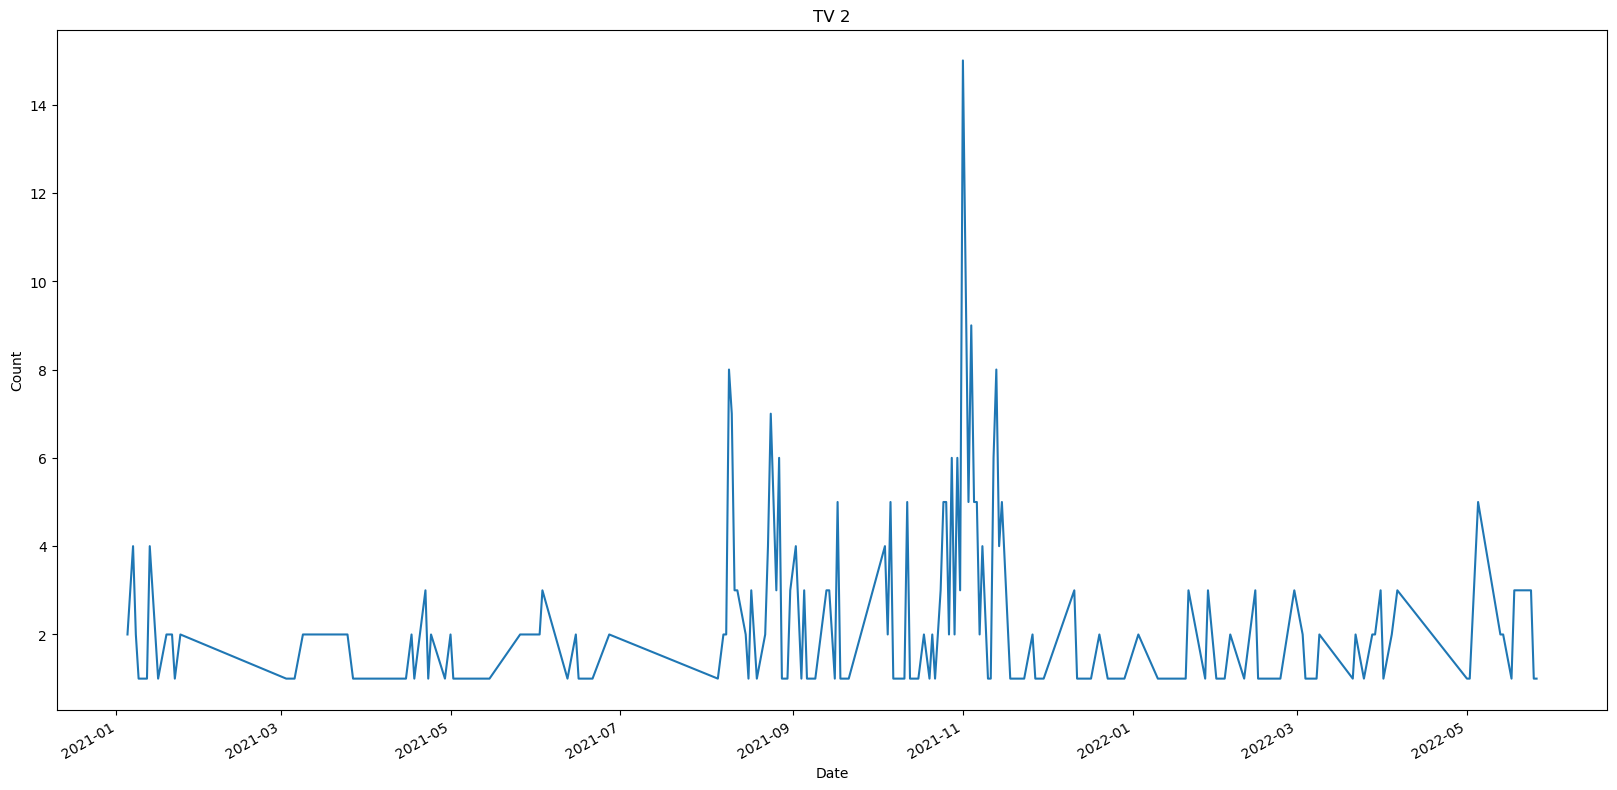

In [188]:
#TV 2

data = df
df = pd.DataFrame(data)

df['pub_day'] = pd.to_datetime(df['pub_day'])

tv2 = df[df.domain.str.contains('tv2.no')]

counts_tv2 = tv2.groupby('pub_day').size().reset_index(name='counts')

#counts_tv2.to_csv('../master/data/tv2.csv')

counts_tv2.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('TV 2')

#plt.savefig('../master/figures/tv2.png')
plt.show()

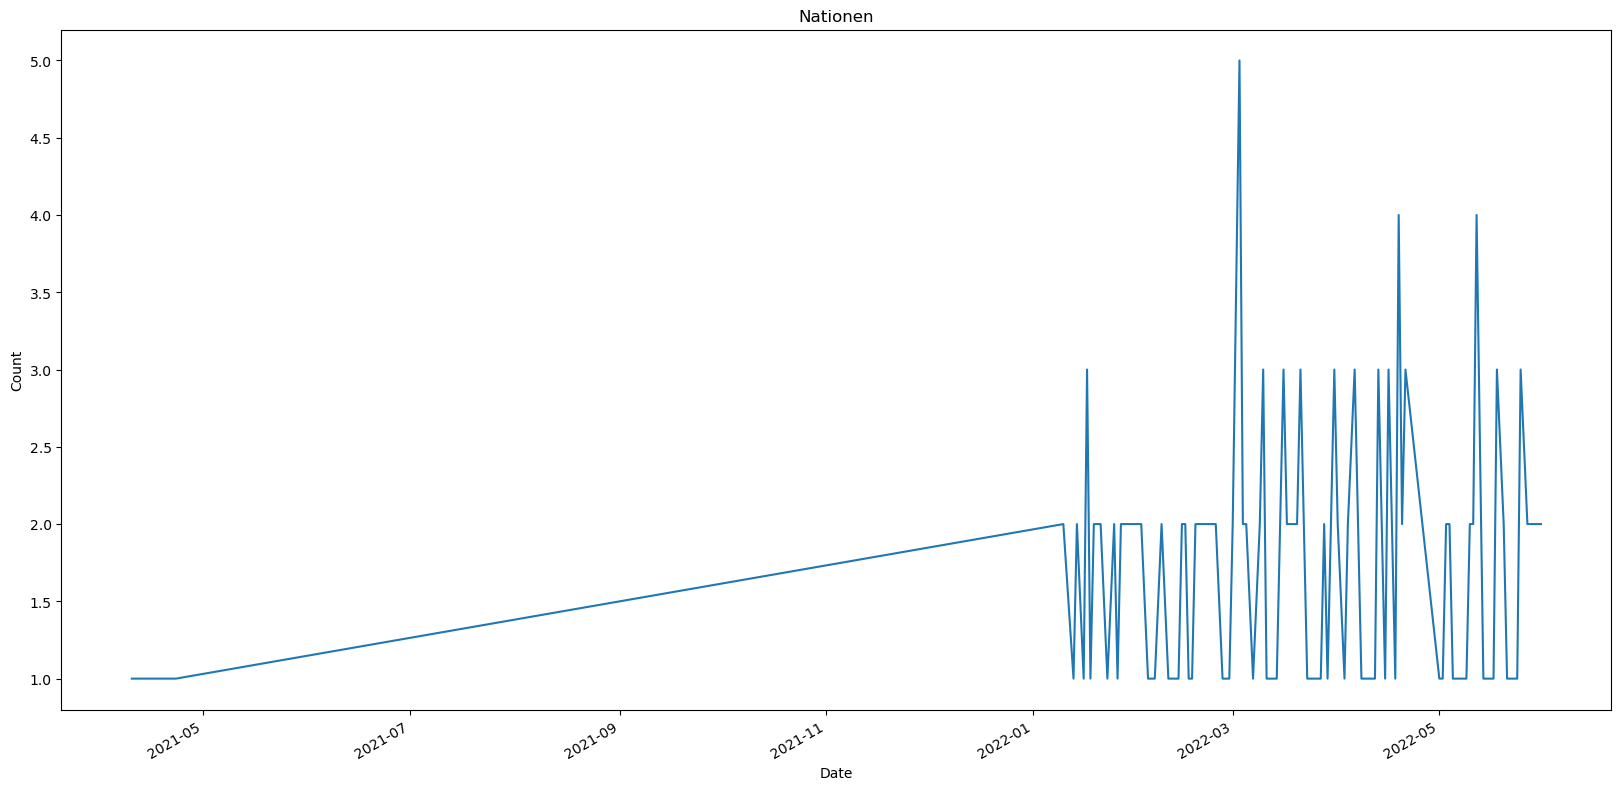

In [189]:
#Nationen

data = df
df = pd.DataFrame(data)

df['pub_day'] = pd.to_datetime(df['pub_day'])

nat = df[df.domain.str.contains('nationen.no')]

counts_nat = nat.groupby('pub_day').size().reset_index(name='counts')

#counts_nat.to_csv('../master/data/nationen.csv')

counts_nat.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Nationen')

#plt.savefig('../master/figures/nationen.png')
plt.show()

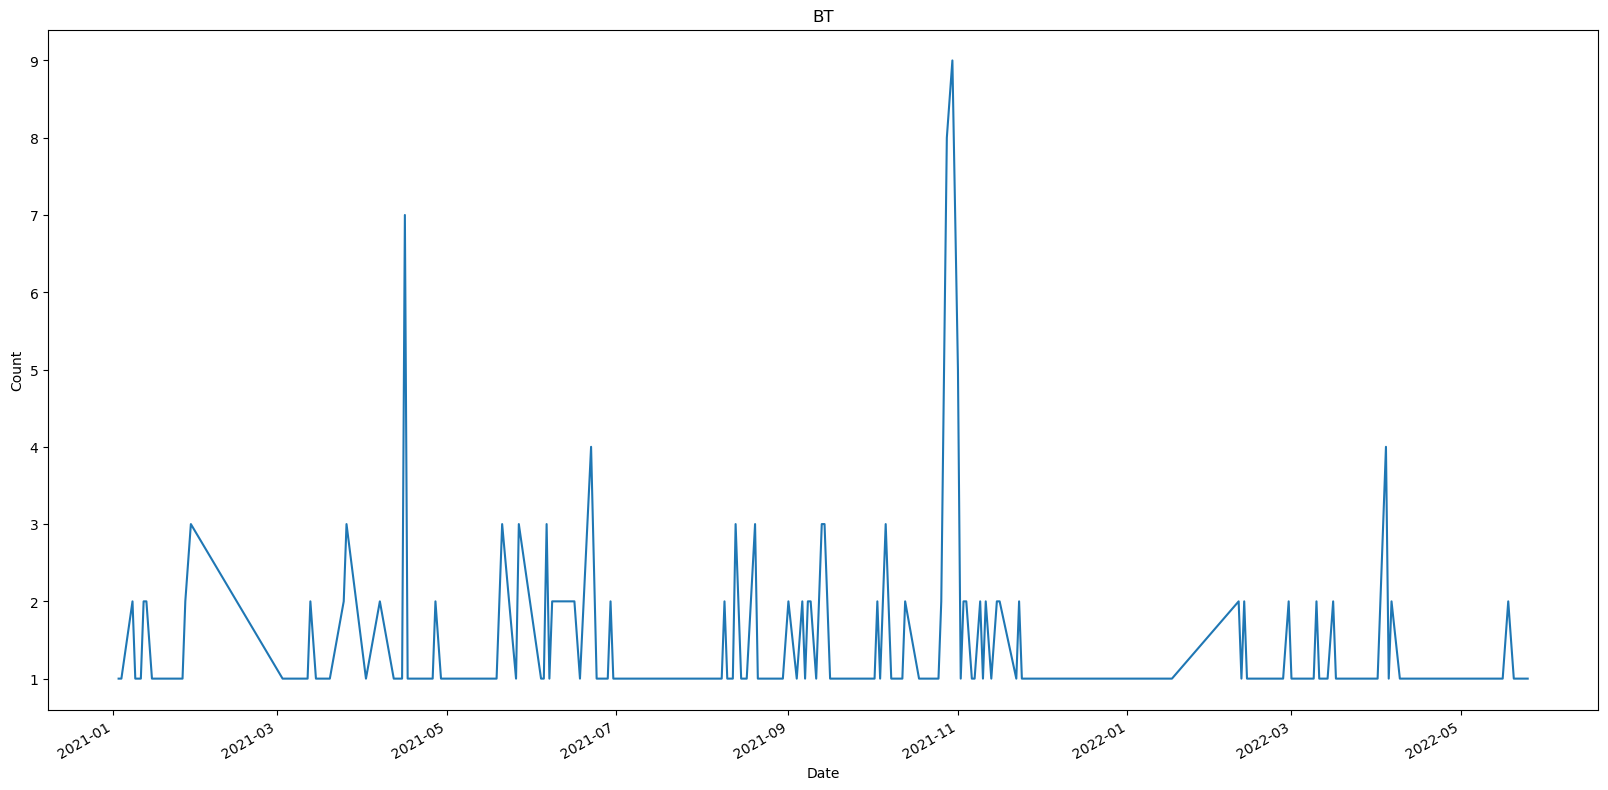

In [190]:
#Bergens Tidende

data = df
df = pd.DataFrame(data)

df['pub_day'] = pd.to_datetime(df['pub_day'])

bt = df[df.domain.str.contains('bt.no')]

counts_bt = bt.groupby('pub_day').size().reset_index(name='counts')

#counts_bt.to_csv('../master/data/bt.csv')

counts_bt.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('BT')

#plt.savefig('../master/figures/bt.png')
plt.show()

In [191]:
counts_nat.head()

,pub_day,counts
0,2021-04-10,1
1,2021-04-23,1
2,2022-01-10,2
3,2022-01-13,1
4,2022-01-14,2


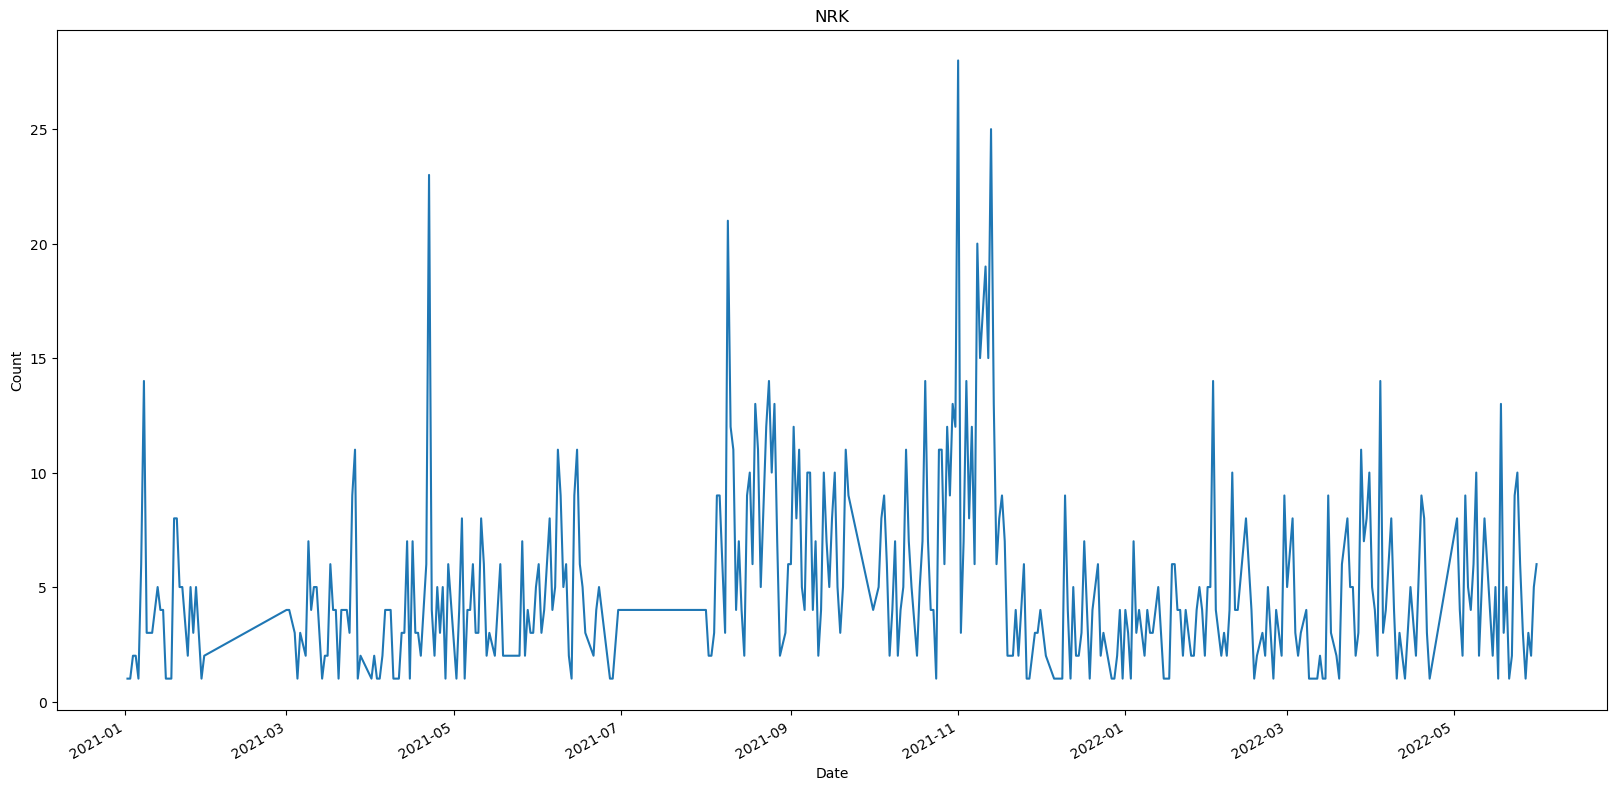

In [194]:
data = df
df = pd.DataFrame(data)

df['pub_day'] = pd.to_datetime(df['pub_day'])

nrk = df[df.domain.str.contains('nrk.no')]

counts_nrk = nrk.groupby('pub_day').size().reset_index(name='counts')

#counts_bt.to_csv('../master/data/bt.csv')

counts_nrk.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('NRK')

#plt.savefig('../master/figures/bt.png')
plt.show()

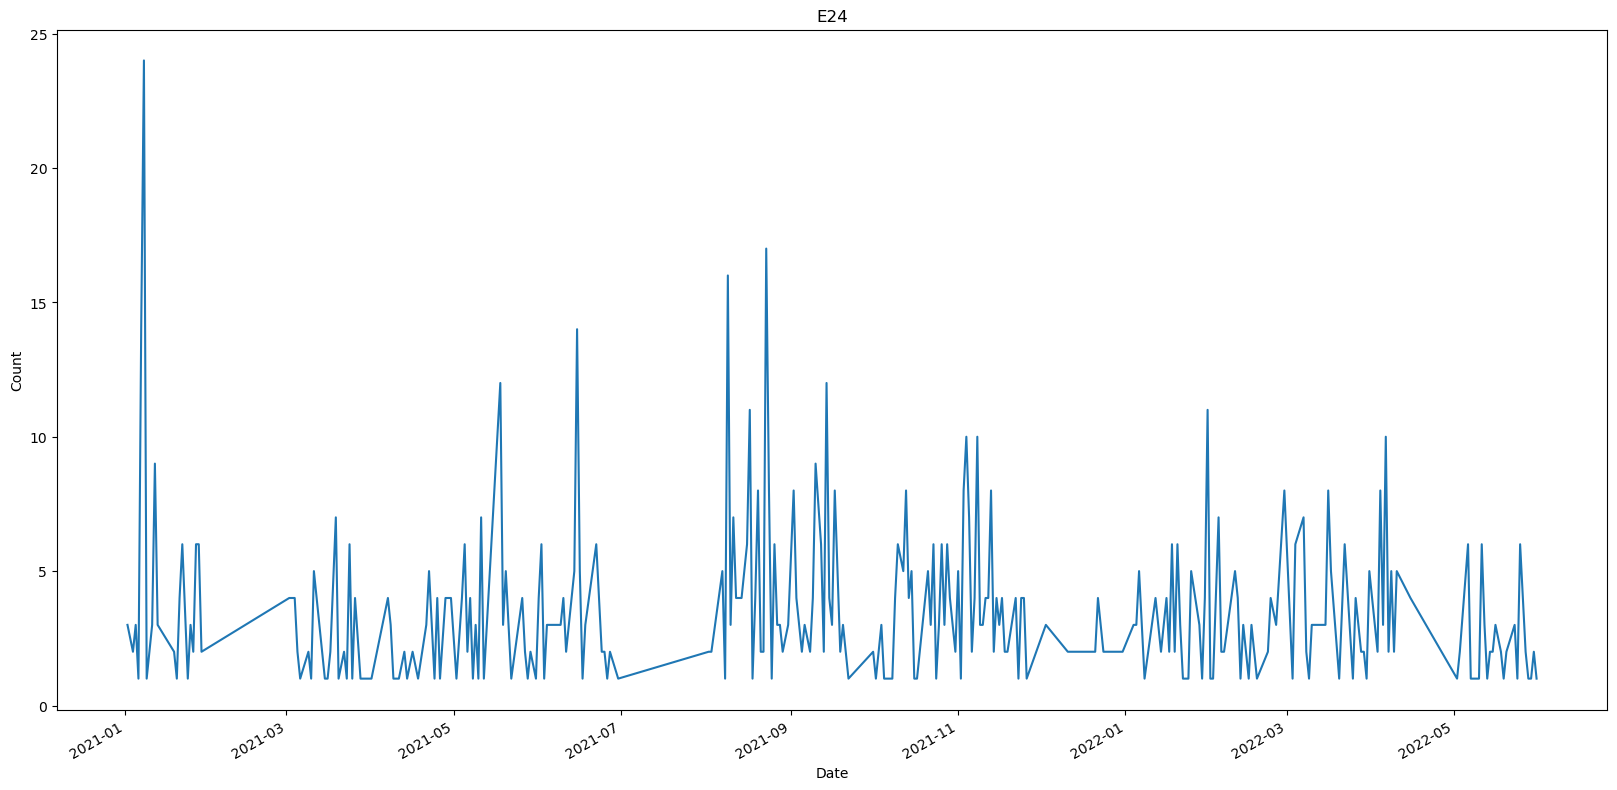

In [195]:
data = df
df = pd.DataFrame(data)

df['pub_day'] = pd.to_datetime(df['pub_day'])

e24 = df[df.domain.str.contains('e24.no')]

counts_e24 = e24.groupby('pub_day').size().reset_index(name='counts')

#counts_bt.to_csv('../master/data/bt.csv')

counts_e24.plot(x='pub_day', y='counts', kind='line', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('E24')

#plt.savefig('../master/figures/bt.png')
plt.show()

In [201]:

#counts_e24.head(10)

spike1 = df[df.pub_day == '2021-01-08']
spike1[df.domain.str.contains('e24')]

/opt/anaconda3/envs/master_thesis/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb,month
id,,,,,,,,,,,,,,,,,,,,,
4zbqjVl5Gdpr,https://e24.no/olje-og-energi/i/R96B22/miljoeo...,https://e24.no/i/R96B22,e24.no,Miljøorganisasjoner ønsker seg en bredere klim...,"Greenpeace, Naturvernforbundet og Fremtiden i ...",Miljøorganisasjoner ønsker seg en bredere klim...,"['Greenpeace', 'Naturvernforbundet', 'Les', 'M...",NaN,NaN,0,...,0.942462,NaN,NaN,2021-01-08,21,miljøorganisasjon ønsk seg en breder klimaplan...,008_303,2021-01-08 21:03:00,False,1
YqaQ1214Manj,https://e24.no/det-groenne-skiftet/i/6zog98/de...,https://e24.no/i/6zog98,e24.no,Dette er Solbergs klimaplan,Regjeringen vil gjøre det langt dyrere å slipp...,Dette er Solbergs klimaplan Regjeringen vil gj...,"['Norge', 'EU', 'Rotevatn', 'Solberg', 'Erna S...",NaN,NaN,0,...,0.967660,"['YqaQ1O9KZanj', 'MYer05ZjwbOB']","['Jrb2xJMlAeWL', 'N1aMj2823bWm']",2021-01-08,18,dett er solberg klimaplan,008_1842,2021-01-08 18:27:00,False,1
oQeZ4w8G6bpZ,https://e24.no/norsk-oekonomi/i/41bgLR/norges-...,https://e24.no/i/41bgLR,e24.no,Fredag la regjeringen frem sin klimaplan. Her ...,Fredag la regjeringen frem sin klimaplan til 2...,Norges klimamål er mange. Her er seks viktige ...,"['Norge', 'EU', 'Parisavtalen', 'Sveinung Rote...",NaN,NaN,0,...,0.997422,['9wdLgYgLXbjP'],NaN,2021-01-08,18,fredag la regjering frem sin klimaplan her er ...,008_948,2021-01-08 18:02:00,False,1
M7e58l7Exd2v,https://e24.no/norsk-oekonomi/i/41bgLR/norges-...,https://e24.no/i/41bgLR,e24.no,Fredag la regjeringen frem sin klimaplan. Her ...,Fredag la regjeringen frem sin klimaplan til 2...,Norges klimamål er mange. Her er seks viktige ...,"['Norge', 'EU', 'Parisavtalen', 'Sveinung Rote...",NaN,NaN,0,...,0.998270,['9wdLgYgLXbjP'],"['X7axG8Nx3eyv', 'zPdy8DmxgbQr', 'LDdwjABL8b1Y...",2021-01-08,18,fredag la regjering frem sin klimaplan her er ...,008_948,2021-01-08 18:02:00,False,1
9wdLgYZgvbjP,https://e24.no/den-groenne-oekonomien/i/rgzyam...,https://e24.no/i/rgzyam,e24.no,Bellona-stifter om klimaplanen: – Å utelate in...,Klimaminister Sveinung Rotevatn mener klimapla...,Bellona-stifter om klimaplanen: – Å utelate in...,"['Norge', 'Bellona', 'Stortinget', 'Sveinung R...",NaN,NaN,0,...,0.519185,NaN,['WZdP1rOWAeKg'],2021-01-08,17,bellon stift om klimaplan å utelat industri er...,008_153,2021-01-08 17:11:00,False,1
l9avllEqndG1,https://e24.no/det-groenne-skiftet/i/rgzyam/be...,https://e24.no/i/rgzyam,e24.no,Bellona-stifter om klimaplanen: – Å utelate in...,Klimaminister Sveinung Rotevatn mener klimapla...,Bellona-stifter om klimaplanen: – Å utelate in...,"['Sveinung Rotevatn', 'Frederic Hauge', 'Solbe...","['Berit Roald', 'Ørn E. Borgen', 'Håkon Mosvol...",NaN,0,...,0.651351,NaN,NaN,2021-01-08,17,bellon stift om klimaplan å utelat industri er...,008_153,2021-01-08 17:11:00,False,1
pnelOvR5jdKB,https://e24.no/den-groenne-oekonomien/i/dlv85J...,https://e24.no/i/dlv85J,e24.no,Erna Solbergs klimaplan vil trolig gi dyrere f...,Regjeringens forslag til klimaplan vil gjøre d...,Erna Solbergs klimaplan vil trolig gi dyrere f...,"['NHO', 'Norge', 'Senterungdommen', 'Torbjørn ...",NaN,NaN,0,...,0.409485,['oQeZ6kVPvepZ'],NaN,2021-01-08,17,ern solberg klimaplan vil trol gi dyrer flybil...,008_2627,2021-01-08 17:10:00,False,1
pmbk5w8JrezJ,https://e24.no/den-groenne-oekonomien/i/dlv85J...,https://e24.no/i/dlv85J,e24.no,Erna Solbergs klimaplan vil trolig gi dyrere f...,Regjeringens forslag til klimaplan vil gjøre d...,Erna Solbergs klimaplan vil trolig gi dyrere f...,"['NHO', 'Norge', 'Senterungdommen', 'Torbjørn ...",NaN,NaN,0,...,0.404326,['oQeZ6kVPvepZ'],"['X7axG8Nx3eyv', 'nXe0gEZZVdxr']",2021-01-08,17,ern solberg klimaplan vil trol gi dyrer flybil...,008_2627,2021-01-08 17:10:00,False,1
8mep88xwyeMy,https://e24.no/det-groenne-skiftet/i/dlv85J/er...,https://e24.no/i/dlv85J,e24.no,Erna Solbergs klimaplan vil trolig gi dyrere f...,Regjeringe

In [210]:

spike1.shape[0]


277

In [214]:
spike2 = df[df.pub_day == '2021-04-22']
spike2.shape[0]

202

In [215]:
spike3.shape[0]

344

In [216]:
spike4.shape[0]

368

In [218]:
spike5 = df[df.pub_day == '2022-04-04']
spike5.shape[0]

189

In [219]:
total_spike = spike1.shape[0] + spike2.shape[0] + spike3.shape[0] + spike4.shape[0] + spike5.shape[0] 
print(total_spike)

1380


In [220]:
diff = df.shape[0] - total_spike
print(diff)

30657


In [227]:
percent = total_spike / diff * 100
print('Articles in the five spikes represents', round(percent,1), '% of all the climate articles.')
#The percent number is presented with only one decimal.

Articles in the five spikes represents 4.5 % of all the climate articles.
